In [1]:
#!pip install textblob
#!pip install tweepy
#!pip install matplotlib
#!pip install python-twitter
!pip install textblob
!pip install tweepy
#!pip install pycountry
#!pip install wordcloud
#!pip install langdetect

You should consider upgrading via the 'C:\Users\Admin.WIN-FBCTH3KTTKS\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Admin.WIN-FBCTH3KTTKS\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [38]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
# Twitter Authentication
consumerKey = "Find your consumerKey"
consumerSecret = "Find your consumerSecret"
accessToken = "Find your accessToken"
accessTokenSecret = "Find your accessTokenSecret"

In [40]:
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [147]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
#tweets = tweepy.Cursor(api.search_tweets,q=keyword,result_type="recent",
#                      until=datetime.datetime.today().strftime('%Y-%m-%d'),
#                      include_entities=True).items(noOfTweet)

tweets = tweepy.Cursor(api.search_tweets,q=keyword).items(noOfTweet)

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
     negative_list.append(tweet.text)
     negative += 1
    
 elif pos > neg:
  positive_list.append(tweet.text)
  positive += 1
 
 elif pos == neg:
  neutral_list.append(tweet.text)
  neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: social responsibility
Please enter how many tweets to analyze: 100


In [148]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  100
positive number:  6
negative number:  11
neutral number:  83


In [149]:
positive_list

,0
0,@ClownWorld_ This is due to the fact that peop...
1,A lot of companies STILL believe the vendor is...
2,"A rich government does not make a rich nation,..."
3,RT @nonhumanworlds: @markamerika I saw her spe...
4,"@markamerika I saw her speak once, she was sca..."
5,hIt will be interesting to see what changes wi...


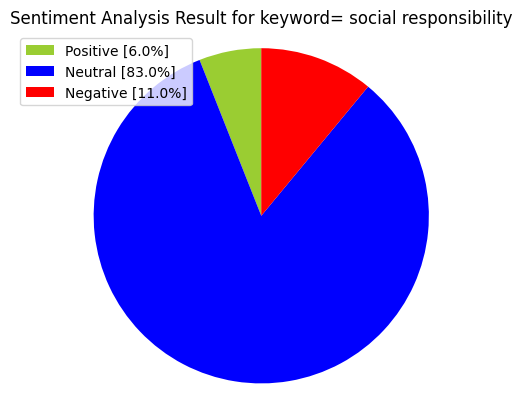

In [150]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"")
plt.axis('equal')
plt.show()

In [151]:
tweet_list


,0
0,BSI menggencarkan implementasi keuangan berkel...
1,RT @nudpiedo: @razzrahul20 @naval TLDR: collec...
2,RT @karthikgnath: Aruna jagadeeshan committee ...
3,RT @karthikgnath: Aruna jagadeeshan committee ...
4,@laurenboebert @tedcruz How sad your comments ...
...,...
95,RT @karthikgnath: Aruna jagadeeshan committee ...
96,"RT @wsbgnl: Whenever they say, “Covid no longe..."
97,RT @karthikgnath: Aruna jagadeeshan committee ...
98,RT @BankAlbilad: (حَسْبِيَ اللّهُ لا إِلَـهَ إ...


In [152]:
tweet_list.drop_duplicates(inplace = True)

In [153]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ',"",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
del tw_list[0]

tw_list.head(10)

,text
0,bsi menggencarkan implementasi keuangan berkel...
1,20 tldr: collectivism is a problem because ...
2,aruna jagadeeshan committee had come out with ...
4,how sad your comments on social media have...
5,a seven-day virtual workshop was organised by ...
9,the state of social and economic rights in the...
11,_ this is due to the fact that people lost th...
12,a lot of companies still believe the vendor is...
13,absolutely. all we're asking for is social r...
14,"_lab the rhetoric of ""taking responsibility..."


In [156]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 #comp = score['compound']
 if neg > pos:
     tw_list.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
     tw_list.loc[index, 'sentiment'] = "positive"
 else:
     tw_list.loc[index, 'sentiment'] = "neutral"
     #tw_list.loc[index, 'neg'] = neg
     #tw_list.loc[index, 'neu'] = neu
     #tw_list.loc[index, 'pos'] = pos
     #tw_list.loc[index, 'compound'] = comp
tw_list.head(100)

,text,polarity,subjectivity,sentiment
0,bsi menggencarkan implementasi keuangan berkel...,0.016667,0.033333,neutral
1,20 tldr: collectivism is a problem because ...,0.033333,0.066667,negative
2,aruna jagadeeshan committee had come out with ...,0.033333,0.066667,neutral
4,how sad your comments on social media have...,-0.233333,0.533333,negative
5,a seven-day virtual workshop was organised by ...,0.000000,0.000000,neutral
9,the state of social and economic rights in the...,-0.255556,0.422222,negative
11,_ this is due to the fact that people lost th...,-0.045833,0.220833,positive
12,a lot of companies still believe the vendor is...,0.200000,0.550000,positive
13,absolutely. all we're asking for is social r...,0.150000,0.429167,negative
14,"_lab the rhetoric of ""taking responsibility...",0.000000,0.000000,neutral


In [157]:
#Removing Punctuation
def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', '', text)
 return text
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

,text,polarity,subjectivity,sentiment,punct,tokenized,nonstop,stemmed
0,bsi menggencarkan implementasi keuangan berkel...,0.016667,0.033333,neutral,bsi menggencarkan implementasi keuangan berkel...,"[bsi, menggencarkan, implementasi, keuangan, b...","[bsi, menggencarkan, implementasi, keuangan, b...","[bsi, menggencarkan, implementasi, keuangan, b..."
1,20 tldr: collectivism is a problem because ...,0.033333,0.066667,negative,2 tldr collectivism is a problem because it...,"[, 2, tldr, collectivism, is, a, problem, beca...","[, 2, tldr, collectivism, problem, cancels, in...","[, 2, tldr, collectiv, problem, cancel, indivi..."
2,aruna jagadeeshan committee had come out with ...,0.033333,0.066667,neutral,aruna jagadeeshan committee had come out with ...,"[aruna, jagadeeshan, committee, had, come, out...","[aruna, jagadeeshan, committee, come, advise, ...","[aruna, jagadeeshan, committe, come, advis, so..."
4,how sad your comments on social media have...,-0.233333,0.533333,negative,how sad your comments on social media have...,"[, how, sad, your, comments, on, social, media...","[, sad, comments, social, media, always, polit...","[, sad, comment, social, media, alway, politic..."
5,a seven-day virtual workshop was organised by ...,0.000000,0.000000,neutral,a sevenday virtual workshop was organised by t...,"[a, sevenday, virtual, workshop, was, organise...","[sevenday, virtual, workshop, organised, schoo...","[sevenday, virtual, workshop, organis, school,..."
